In [1]:
import plot
import numpy as np
import os
import cv2 as cv
import random as rng
rng.seed(42)

In [ ]:
imgk = np.array([[255,255,0,255,255,255,0,255],[255,255,0,255,0,255,0,255],[255,255,255,255,0,0,0,255],[0,0,0,0,0,0,0,255],
        [255,255,255,255,0,255,0,255],[0,0,0,255,0,255,0,255],[255,255,255,255,0,0,0,255],[255,255,255,255,0,255,255,255]], dtype=np.uint8)
# plot.imgView(imgk)

In [2]:
path = '/Users/katherinegarcia/Desktop/Vision/imgs/'

# img a color
im = cv.imread(os.path.join(path,'baboon.tiff'), cv.IMREAD_COLOR)
# RGB -> BGR
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
# img bw
# imBW = cv.imread(os.path.join(path,'rice.png'), cv.IMREAD_GRAYSCALE)
imBW = cv.imread(os.path.join(path,'fprint3.pgm'), cv.IMREAD_GRAYSCALE)

In [3]:
def imgPad(img, r):
    padded = np.pad(img,pad_width=r)
    # padded = np.pad(img,r,'constant',constant_values=0)
    return padded

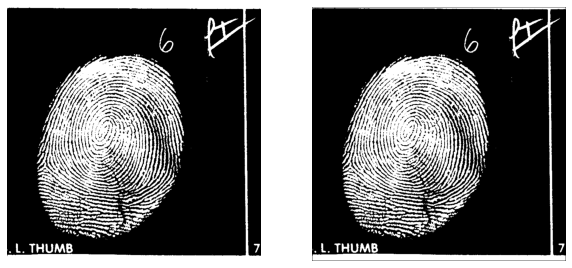

In [4]:
# pad = imgPad(imgk,1)
# plot.imgView(pad)

riceBin = cv.threshold(imBW,128,255,cv.THRESH_BINARY_INV|cv.THRESH_OTSU)[1]
ricePad = imgPad(riceBin,1)
plot.imgComp(riceBin,ricePad, "")

# imgMiniBin = cv.threshold(pad,128,255,cv.THRESH_BINARY|cv.THRESH_OTSU)[1]
# imgMiniBin = imgMiniBin[:32,:32]

In [5]:
def connected_c(img):
    # binarizar la img - el blanco es el objeto de interes
    rows,cols = img.shape
    label = 1
    info = {}
    new = np.zeros((rows,cols), dtype=np.int64)

    # First Pass
    for i in range(1, rows-1):
        for j in range(1, cols-1):# i filas j columnas
            if img[i][j] != 0:
                n1 = img[i-1][j]
                n2 = img[i][j-1]
                if n1 == 0 and n2 == 0: # no hay vecinos
                    info[label] = [label]
                    new[i][j] = label
                    label += 1
                elif n1 != 0 or n2 != 0: 
                    nlabels = [new[i-1][j],new[i][j-1]] # neighbor labels
                    mini = min(i for i in nlabels if i != 0)
                    maxi = max(i for i in nlabels if i != 0)
                    new[i][j] = mini
                    if maxi not in info[mini]:
                        info[mini].append(maxi)

    # only relations, no singles
    list1 = [k for k,v in info.items() if len(v)<=1]
    for i in list1:
        info.pop(i)

    # Second Pass
    for i in range(0, rows):
        for j in range(0, cols):# i filas j columnas
            if new[i][j] != 0:
                for k,v in info.items():
                    if new[i][j] in v and new[i][j] != k : 
                        new[i][j] = k

    return new


In [6]:
# new = connected_c(pad)
new2 = connected_c(ricePad)

In [7]:
def labelview(labels):
    rows,cols = labels.shape
    new = np.zeros((rows,cols,3), dtype=np.uint8)
    colors = []
    labs = np.unique(labels)
    labs = labs[labs != 0] # no 0 
    for l in labs:
        colors.append((rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)))
    
    lenLabs = list(range(0, len(labs)))
    for i in range(0, rows):
        for j in range(0, cols):# i filas j columnas
            if labels[i][j] != 0:
                for c in range(len(labs)):
                    if labs[c] == labels[i][j]:
                        new[i][j] = colors[lenLabs[c]]

    plot.imgView(new)

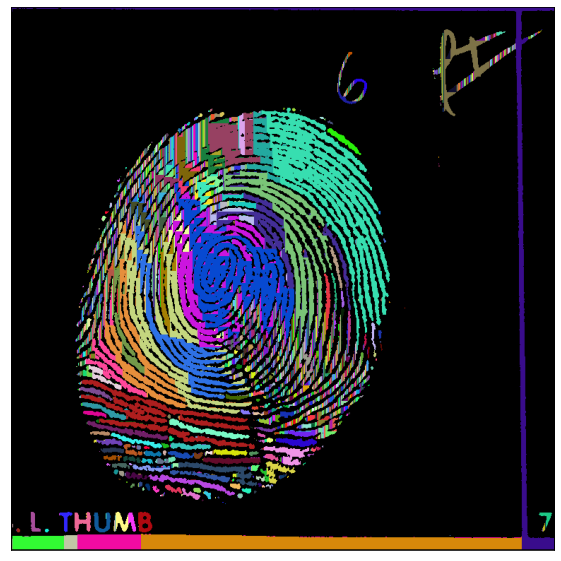

In [8]:
labelview(new2)